In [0]:
!pip install openpyxl

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:



# =====================================================
#  USE CASE 1: Customer Trends Analysis
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import os

# -----------------------------------------------------
# ✅ STEP 1 — Load Dataset from DBFS
# (Upload your file to Databricks > Data > DBFS > FileStore > tables)
# Example upload path: /FileStore/tables/ecommerce_200rows.xlsx
# -----------------------------------------------------
df = pd.read_excel("/Volumes/capston_project-priya_saini(24mbmb34)/default/capston_project-priya_saini(24mbmb34)/ecommerce_data.xlsx", parse_dates=["purchase_date"])

# ----------------------------------------------------
# check data
df





,transaction_id,customer_id,age,gender,location,product_id,category,price,quantity,purchase_date,device,session_duration_min,promo_used,rating,completed,total_spent,implied_rating
0,TXN_000001,CUST_01456,22,F,Mumbai,PROD_0892,Home Decor,1902.83,2,2024-03-05,desktop,16.4,1,2,0,3805.66,2
1,TXN_000002,CUST_01640,27,F,Pune,PROD_0684,Beauty,3683.56,1,2023-11-01,mobile,27.1,0,4,1,3683.56,4
2,TXN_000003,CUST_00992,28,F,Pune,PROD_0965,Beauty,793.28,3,2024-09-22,desktop,4.3,0,5,0,2379.84,5
3,TXN_000004,CUST_04361,37,F,Chennai,PROD_0919,Home Decor,670.91,3,2023-01-02,desktop,22.4,1,1,1,2012.73,2
4,TXN_000005,CUST_03664,31,M,Kolkata,PROD_0452,Grocery,2501.22,1,2024-10-14,mobile,4.2,1,5,0,2501.22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TXN_099996,CUST_04236,56,M,Delhi,PROD_0766,Toys,2434.45,3,2024-06-11,desktop,10.0,1,2,1,7303.35,2
99996,TXN_099997,CUST_01048,18,F,Kolkata,PROD_0026,Books,1968.93,2,2023-06-22,mobile,15.7,1,5,0,3937.86,5
99997,TXN_099998,CUST_04301,20,F,Jaipur,PROD_0009,Electronics,1086.56,1,2023-08-12,mobile,17.0,0,1,1,1086.56,1
99998,TXN_099999,CUST_02228,53,M,Bangalore,PROD_0405,Clothing,4842.43,4,2023-01-17,mobile,21.9,1,1,0,19369.72,1


Monthly revenue:
       month  total_spent month_str
0   2023-01  28788717.96   2023-01
1   2023-02  24807304.20   2023-02
2   2023-03  28459427.94   2023-03
3   2023-04  28747236.41   2023-04
4   2023-05  29159574.66   2023-05
5   2023-06  27583406.49   2023-06
6   2023-07  28872438.97   2023-07
7   2023-08  27964614.44   2023-08
8   2023-09  27060818.52   2023-09
9   2023-10  28337080.76   2023-10
10  2023-11  27540889.62   2023-11
11  2023-12  29244185.28   2023-12
12  2024-01  29531951.33   2024-01
13  2024-02  26404497.27   2024-02
14  2024-03  28610342.48   2024-03
15  2024-04  28453644.40   2024-04
16  2024-05  28764628.41   2024-05
17  2024-06  28508882.44   2024-06
18  2024-07  28640066.37   2024-07
19  2024-08  29238396.24   2024-08
20  2024-09  26699139.84   2024-09
21  2024-10  29537029.26   2024-10
22  2024-11  28010848.93   2024-11
23  2024-12    865896.95   2024-12

Top categories by revenue:
       category  total_spent
0       Sports  83074264.27
1         Toys  825456

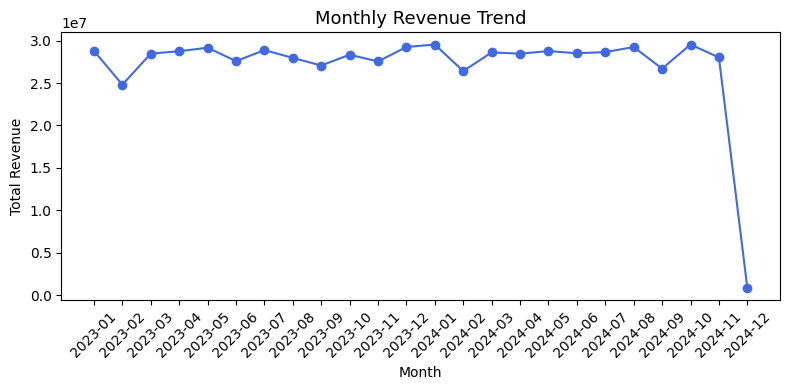

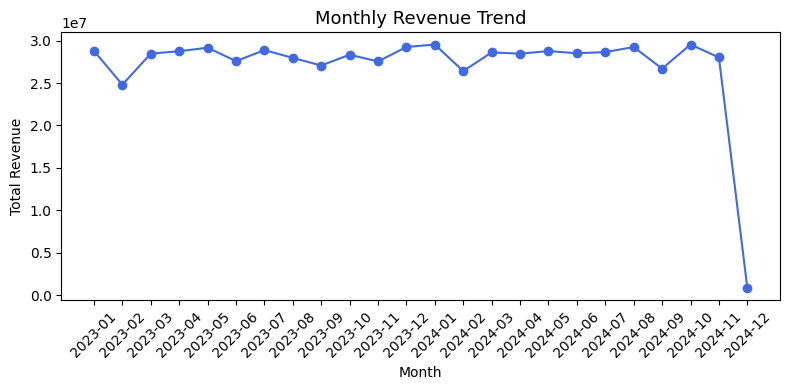

In [0]:
# -----------------------------------------------------
# ✅ STEP 2 — Data Preprocessing & Grouping
# -----------------------------------------------------
df["month"] = df["purchase_date"].dt.to_period("M")

# 1️⃣ Monthly revenue trend
monthly = df.groupby("month")["total_spent"].sum().reset_index()
monthly["month_str"] = monthly["month"].astype(str)

# 2️⃣ Top categories by revenue
cat_rev = df.groupby("category")["total_spent"].sum().sort_values(ascending=False).reset_index()

# 3️⃣ Device breakdown
device_counts = df.groupby("device")["total_spent"].agg(["sum", "count"]).reset_index()

# 4️⃣ Promo uplift (AOV)
aov = df.groupby("promo_used")["total_spent"].mean().reset_index().rename(columns={"total_spent": "avg_order_value"})

# -----------------------------------------------------
# ✅ STEP 3 — Print Summary Tables
# -----------------------------------------------------
print("Monthly revenue:\n", monthly)
print("\nTop categories by revenue:\n", cat_rev)
print("\nDevice revenue & transaction counts:\n", device_counts)
print("\nAOV by promo used (0=no,1=yes):\n", aov)

# -----------------------------------------------------
# ✅ STEP 4 — Visualization Section
# -----------------------------------------------------
plt.style.use("seaborn-v0_8-colorblind")



# --- 1️⃣ Line chart — Monthly Revenue Trend
plt.figure(figsize=(8, 4))
plt.plot(monthly["month_str"], monthly["total_spent"], marker='o', color='royalblue')
plt.title("Monthly Revenue Trend", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
display(plt.gcf())





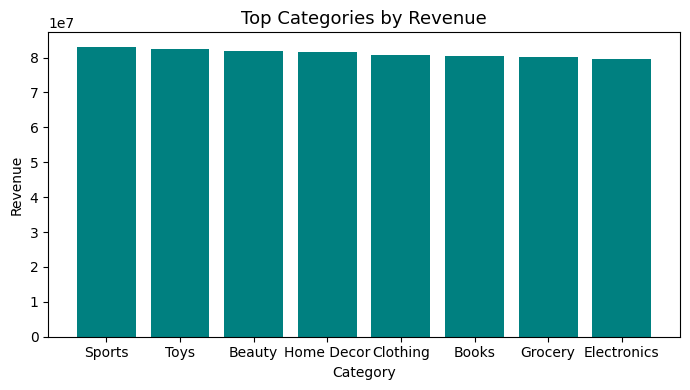

In [0]:
# --- 2️⃣ Bar chart — Top Categories by Revenue
plt.figure(figsize=(7, 4))
plt.bar(cat_rev["category"], cat_rev["total_spent"], color='teal')
plt.title("Top Categories by Revenue", fontsize=13)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()

display(plt.gcf())
plt.close()



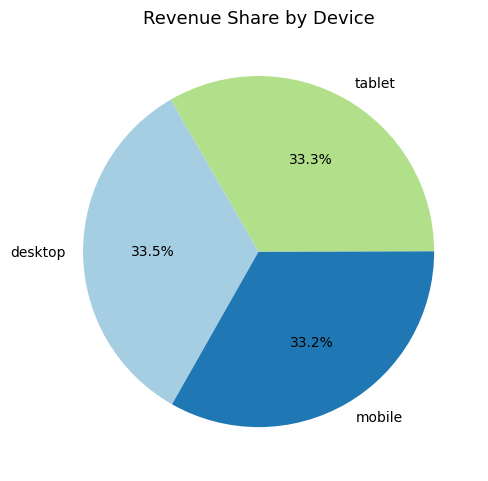

In [0]:
# --- 3️⃣ Pie chart — Device Revenue Share
plt.figure(figsize=(5, 5))
plt.pie(device_counts["sum"], labels=device_counts["device"], autopct='%1.1f%%', startangle=120, colors=plt.cm.Paired.colors)
plt.title("Revenue Share by Device", fontsize=13)
plt.tight_layout()
display(plt.gcf())
plt.close()



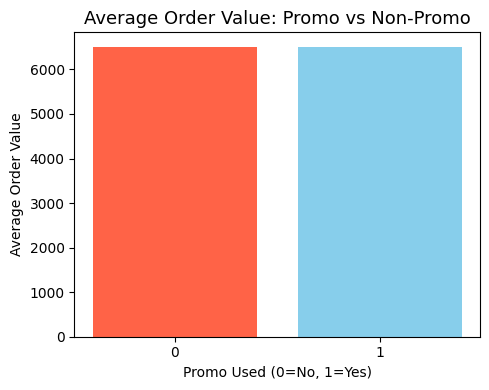

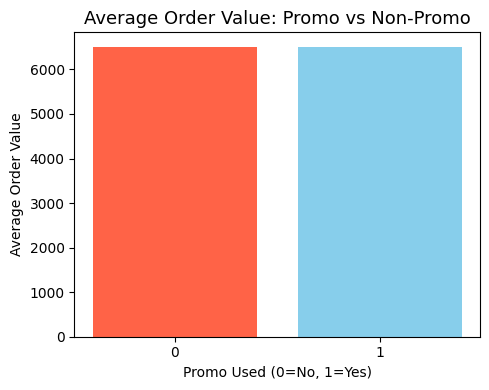

In [0]:
# --- 4️⃣ Bar chart — Promo vs Non-Promo Average Order Value
plt.figure(figsize=(5, 4))
plt.bar(aov["promo_used"].astype(str), aov["avg_order_value"], color=['tomato', 'skyblue'])
plt.title("Average Order Value: Promo vs Non-Promo", fontsize=13)
plt.xlabel("Promo Used (0=No, 1=Yes)")
plt.ylabel("Average Order Value")
plt.tight_layout()

display(plt.gcf())
